In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [244]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [259]:
df = pd.read_csv('/content/drive/MyDrive/internet_service_churn.csv')

In [246]:
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [247]:
df.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


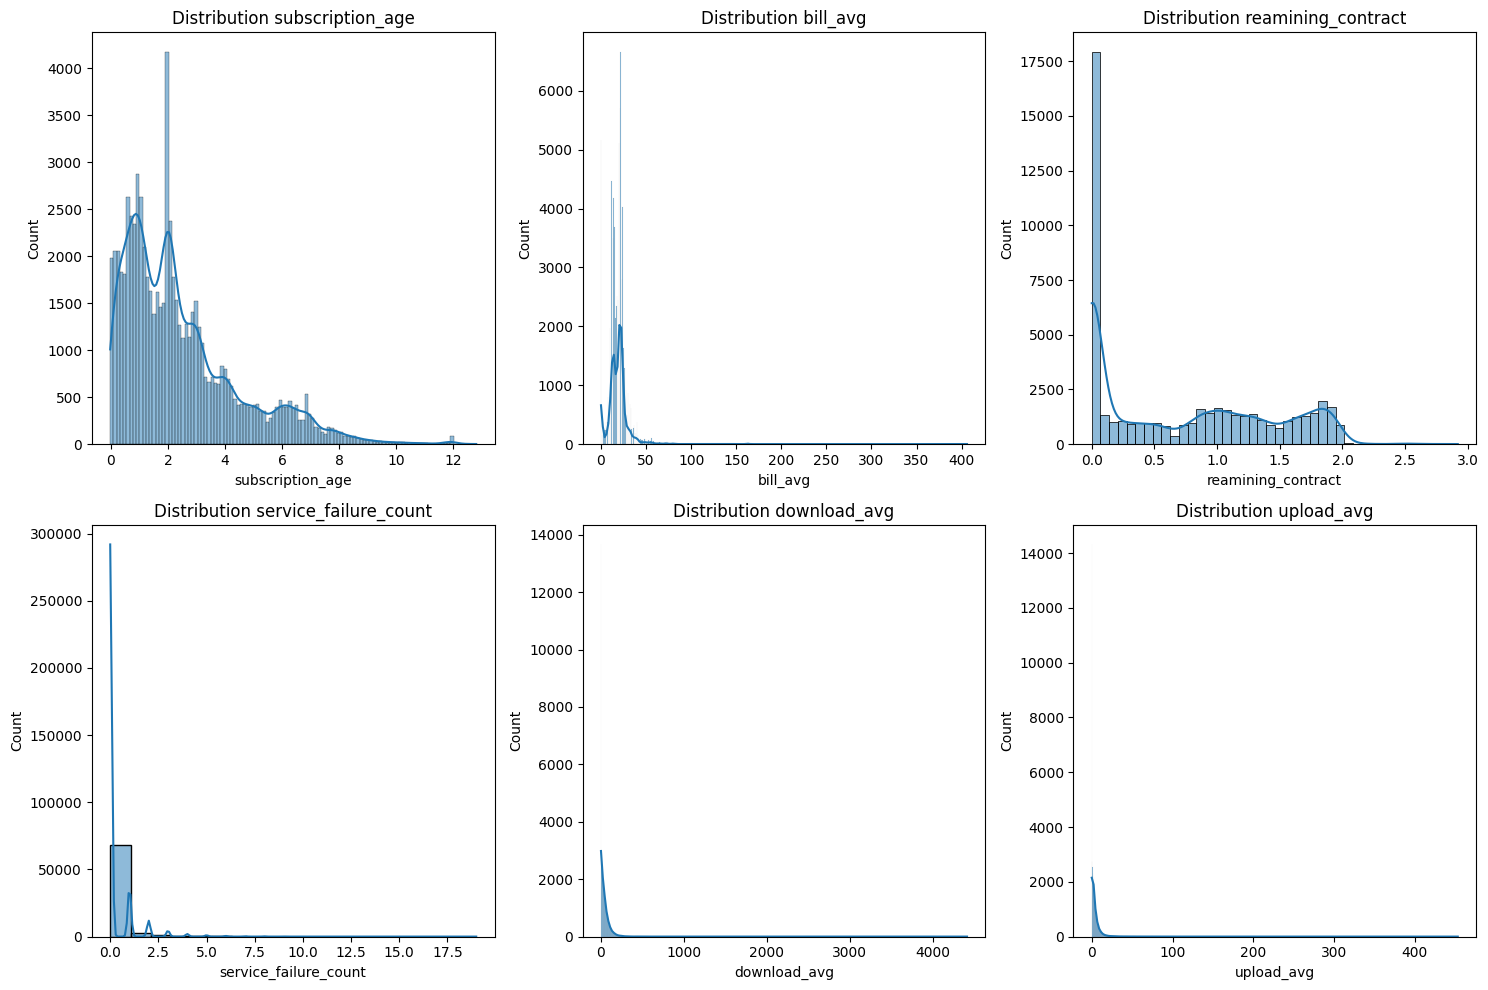

In [248]:
# Вивчення розподілів числових змінних
numeric_cols = ['subscription_age', 'bill_avg', 'reamining_contract', 'service_failure_count','download_avg', 'upload_avg']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution {col}')
plt.tight_layout()
plt.show()

In [249]:
df.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,50702.000000,72274.000000,71893.000000,71893.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.716039,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.697102,0.816621,63.405963,9.818896,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.700000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.570000,0.000000,27.800000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.310000,0.000000,60.500000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


In [250]:
# Виявлення відсутніх значень
missing_values = df.isnull().sum()
print(missing_values)

id                                 0
is_tv_subscriber                   0
is_movie_package_subscriber        0
subscription_age                   0
bill_avg                           0
reamining_contract             21572
service_failure_count              0
download_avg                     381
upload_avg                       381
download_over_limit                0
churn                              0
dtype: int64


In [260]:
df['reamining_contract'] = df['reamining_contract'].fillna(0)
df['download_avg'].fillna(df['download_avg'].mean(), inplace=True)
df['upload_avg'].fillna(df['upload_avg'].mean(), inplace=True)

In [252]:
df.describe()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
count,7.227400e+04,72274.000000,72274.000000,72274.000000,72274.000000,72274.000000,72274.000000,72274.000000,72274.000000,72274.000000,72274.000000
mean,8.463182e+05,0.815259,0.334629,2.450051,18.942483,0.502319,0.274234,43.689911,4.192076,0.207613,0.554141
std,4.891022e+05,0.388090,0.471864,2.034990,13.215386,0.669524,0.816621,63.238614,9.792981,0.997123,0.497064
min,1.500000e+01,0.000000,0.000000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.222165e+05,1.000000,0.000000,0.930000,13.000000,0.000000,0.000000,6.800000,0.500000,0.000000,0.000000
50%,8.477840e+05,1.000000,0.000000,1.980000,19.000000,0.000000,0.000000,28.100000,2.100000,0.000000,1.000000
75%,1.269562e+06,1.000000,1.000000,3.300000,22.000000,1.040000,0.000000,60.200000,4.800000,0.000000,1.000000
max,1.689744e+06,1.000000,1.000000,12.800000,406.000000,2.920000,19.000000,4415.200000,453.300000,7.000000,1.000000


In [261]:
missing_values = df.isnull().sum()
print(missing_values)

id                             0
is_tv_subscriber               0
is_movie_package_subscriber    0
subscription_age               0
bill_avg                       0
reamining_contract             0
service_failure_count          0
download_avg                   0
upload_avg                     0
download_over_limit            0
churn                          0
dtype: int64


In [262]:
# Обчислення матриці кореляцій
correlation_matrix = df.corr()

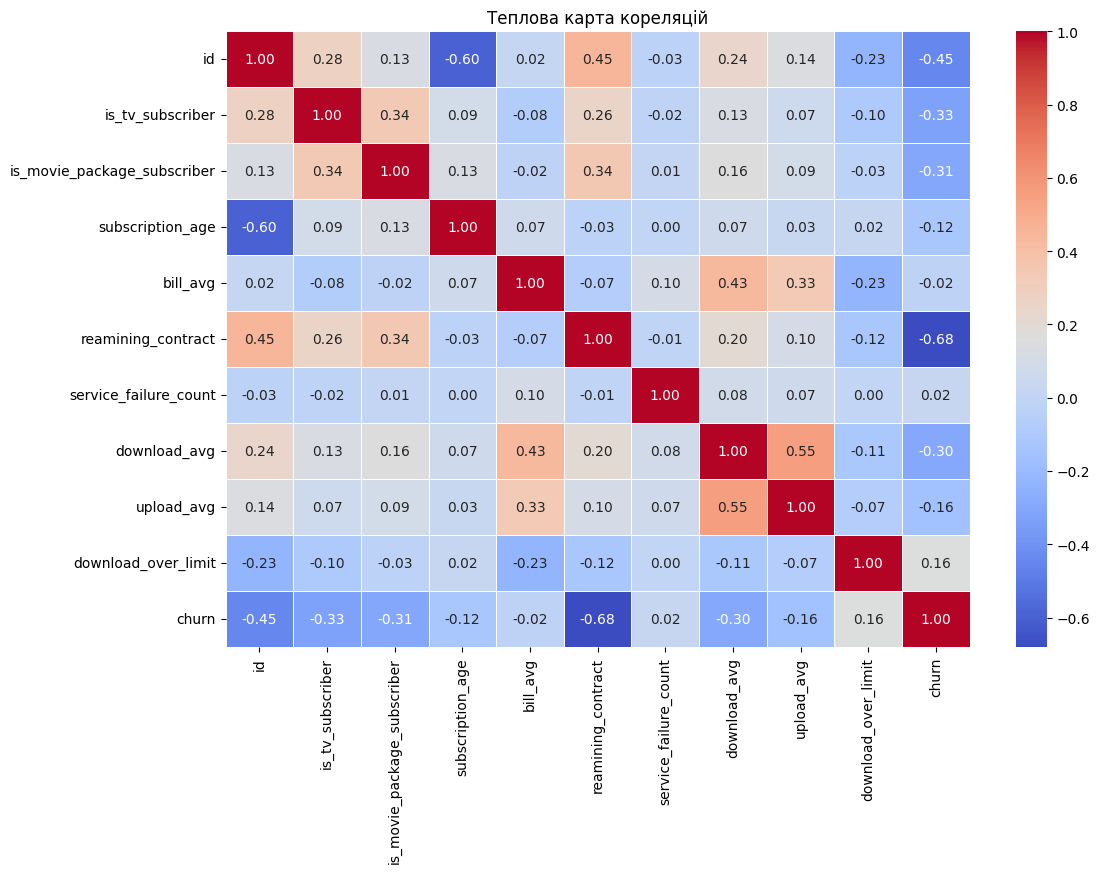

In [263]:
# Візуалізація теплової карти кореляцій
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Теплова карта кореляцій')
plt.show()

In [264]:
# Виявлення аномалій за допомогою IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df_no_outliers_iqr = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [265]:
df = df_no_outliers_iqr

In [266]:
# Ініціалізація нормалізатора
scaler = MinMaxScaler()

df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
4,34,0,0,0.933042,0.000000,0.0,0.0,0.0,0.0,0,1
12,213,0,0,0.969432,0.285714,0.0,0.0,0.0,0.0,0,1
13,222,0,0,0.807860,0.400000,0.0,0.0,0.0,0.0,0,1
18,475,0,0,0.994178,0.400000,0.0,0.0,0.0,0.0,0,1
20,530,0,0,0.868996,0.000000,0.0,0.0,0.0,0.0,0,1


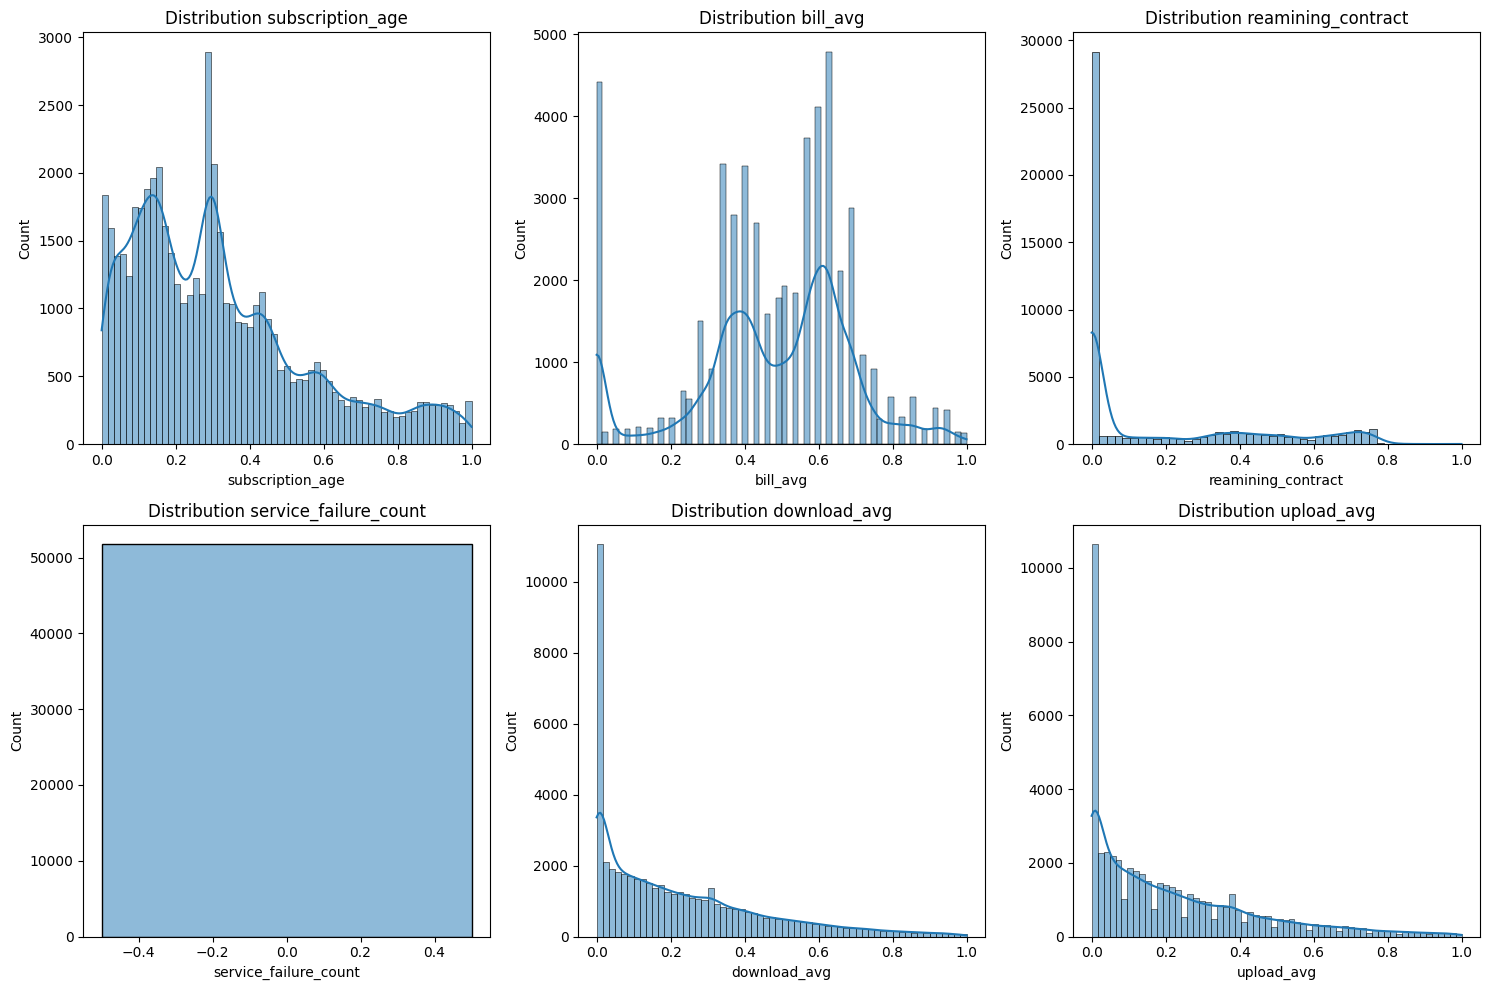

In [267]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution {col}')
plt.tight_layout()
plt.show()

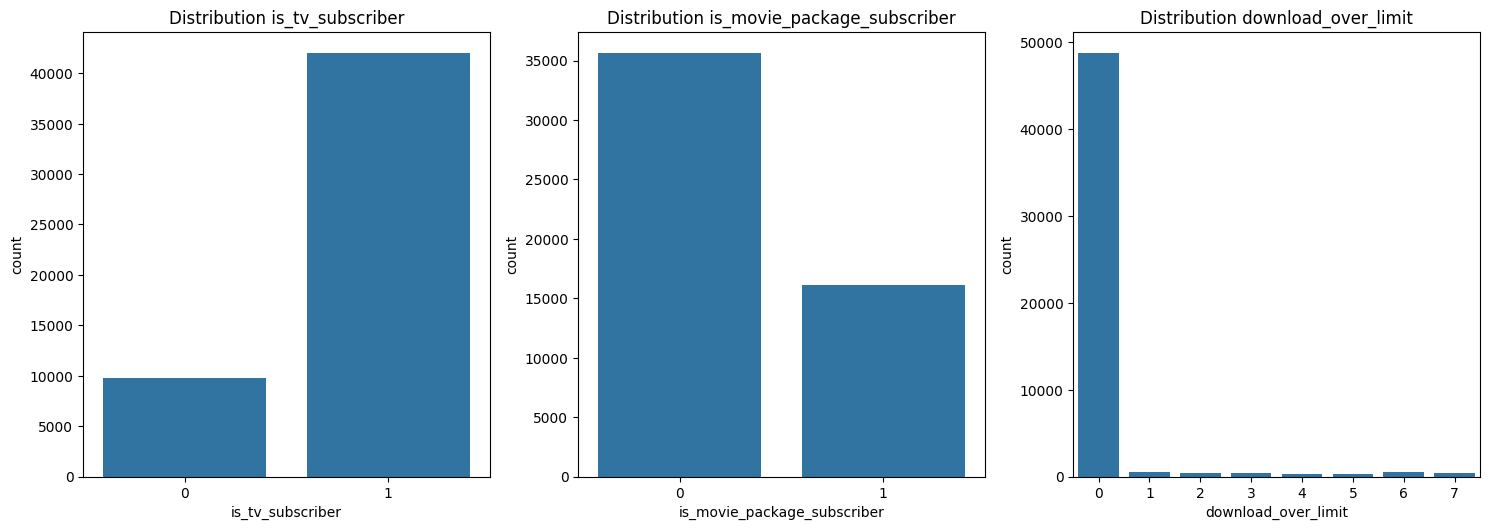

In [268]:
# Вивчення розподілів бінарних змінних
binary_cols = ['is_tv_subscriber', 'is_movie_package_subscriber', 'download_over_limit']

plt.figure(figsize=(15, 10))
for i, col in enumerate(binary_cols):
    plt.subplot(2, 3, i+1)
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution {col}')
plt.tight_layout()
plt.show()

In [269]:
# Визначення ознак та цільової змінної
X = df.drop(columns=['id', 'churn'])
y = df['churn']

In [270]:
# Розділення даних на тренувальну та тестову вибірки
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Розділення тренувальної вибірки на тренувальну та валідаційну
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.3, random_state=42, stratify=y_train_temp)


In [271]:
# Перевірка розмірів
print(f'Розмір тренувальної вибірки: {X_train.shape[0]} записів')
print(f'Розмір валідаційної вибірки: {X_val.shape[0]} записів')
print(f'Розмір тестової вибірки: {X_test.shape[0]} записів')

Розмір тренувальної вибірки: 25347 записів
Розмір валідаційної вибірки: 10863 записів
Розмір тестової вибірки: 15519 записів


In [272]:
# Збереження DataFrame у файл CSV
df.to_csv('data.csv', index=False)